<a href="https://colab.research.google.com/github/gustavomachin/PortfolioOptimization_Python/blob/master/Optimizaci%C3%B3nCarterasPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Optimización de carteras con Python**
##Teoría moderna de cartera de Harry Markowitz


La optimización de carteras intenta determinar la combinación de aactivos financieros que entregue el menor riesgo para un máximo rendimiento de una inversión bursátil. 


## **Instalar e importar las bibliotecas necesarios**

In [ ]:
pip install yfinance

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **Obtener los datos de las acciones de forma remota y visualizarlos**

*yfinance* es una biblioteca de Pyhon que permite obtener de manera remota los datos históricos del mercado financiero mediante la conexion a la API pública de Yahoo! Fincance. Lo hace de una manera muy simple, con unas poquísimas líneas de código. 

*yfinance* no solo permite descargar los datos históricos como precios, volumen negociado o pago de vividendos de diversos activos financieros tales como acciones, bonos, criptomonedas, etc., sino que también permite descargar y visualizar todo tipo de información relevnte que se encuntre disponible en Yahoo! Finance.

### **PASO 1:** Armamos una lista con los símbolos (tickers) de las acciones que consideramos  incorporar a la cartera.

In [ ]:
simbolos = ["AAPL","MSFT","TSLA","FB","NVDA"]

### **PASO 2:** Obtenemos el conjutno de datos completos (Precio de cierre ajustado, mayor precio, menor precio, precio de apertura y volumen negociado) para las acciones antes definidas y según los parámetros establecidos.

In [ ]:
df = yf.download(simbolos, start='2021-01-01', rounding=True)
df

[*********************100%***********************]  5 of 5 completed


Adj Close                  ...    Volume                    
                AAPL      FB    MSFT  ...      MSFT      NVDA      TSLA
Date                                  ...                              
2021-01-04    128.62  268.94  215.88  ...  37130100  56064000  48638200
2021-01-05    130.21  270.97  216.09  ...  23823000  32276000  32245200
2021-01-06    125.82  263.31  210.49  ...  35930700  58042400  44700000
2021-01-07    130.12  268.74  216.48  ...  27694500  46148000  51498900
2021-01-08    131.24  267.57  217.79  ...  22956200  29252800  75055500
...              ...     ...     ...  ...       ...       ...       ...
2022-01-10    172.19  328.07  314.27  ...  44289500  59468100  30605000
2022-01-11    175.08  334.37  314.98  ...  29386800  40408900  22021100
2022-01-12    175.53  333.26  318.27  ...  34372200  38341300  27913000
2022-01-13    172.19  326.48  304.80  ...  45366000  54017100  32403300
2022-01-14    173.07  331.90  310.20  ...  39823500  39522800  24246600

[262 rows x 30 columns]

### **PASO 3:** Seleccionamos la columna correspondiente al precio de cierre ajustado (Adj Close) y definimos un nuevo data frame (df1). 

In [ ]:
df1 = df['Adj Close']
df1

,AAPL,FB,MSFT,NVDA,TSLA
Date,,,,,
2021-01-04,128.62,268.94,215.88,131.02,729.77
2021-01-05,130.21,270.97,216.09,133.93,735.11
2021-01-06,125.82,263.31,210.49,126.03,755.98
2021-01-07,130.12,268.74,216.48,133.32,816.04
2021-01-08,131.24,267.57,217.79,132.65,880.02
...,...,...,...,...,...
2022-01-10,172.19,328.07,314.27,274.00,1058.12
2022-01-11,175.08,334.37,314.98,278.17,1064.40
2022-01-12,175.53,333.26,318.27,279.99,1106.22


### **PASO 4:** Visualizamos las cotizaciones de cada una de las acciones. Usamos la biblioteca de graficación *matplotlib*. Es posible usar otras bibliotecas tales como *plotly*, *altair* o *seaborn*. Es objetivo es realizar un análisis preliminar de cada activo.

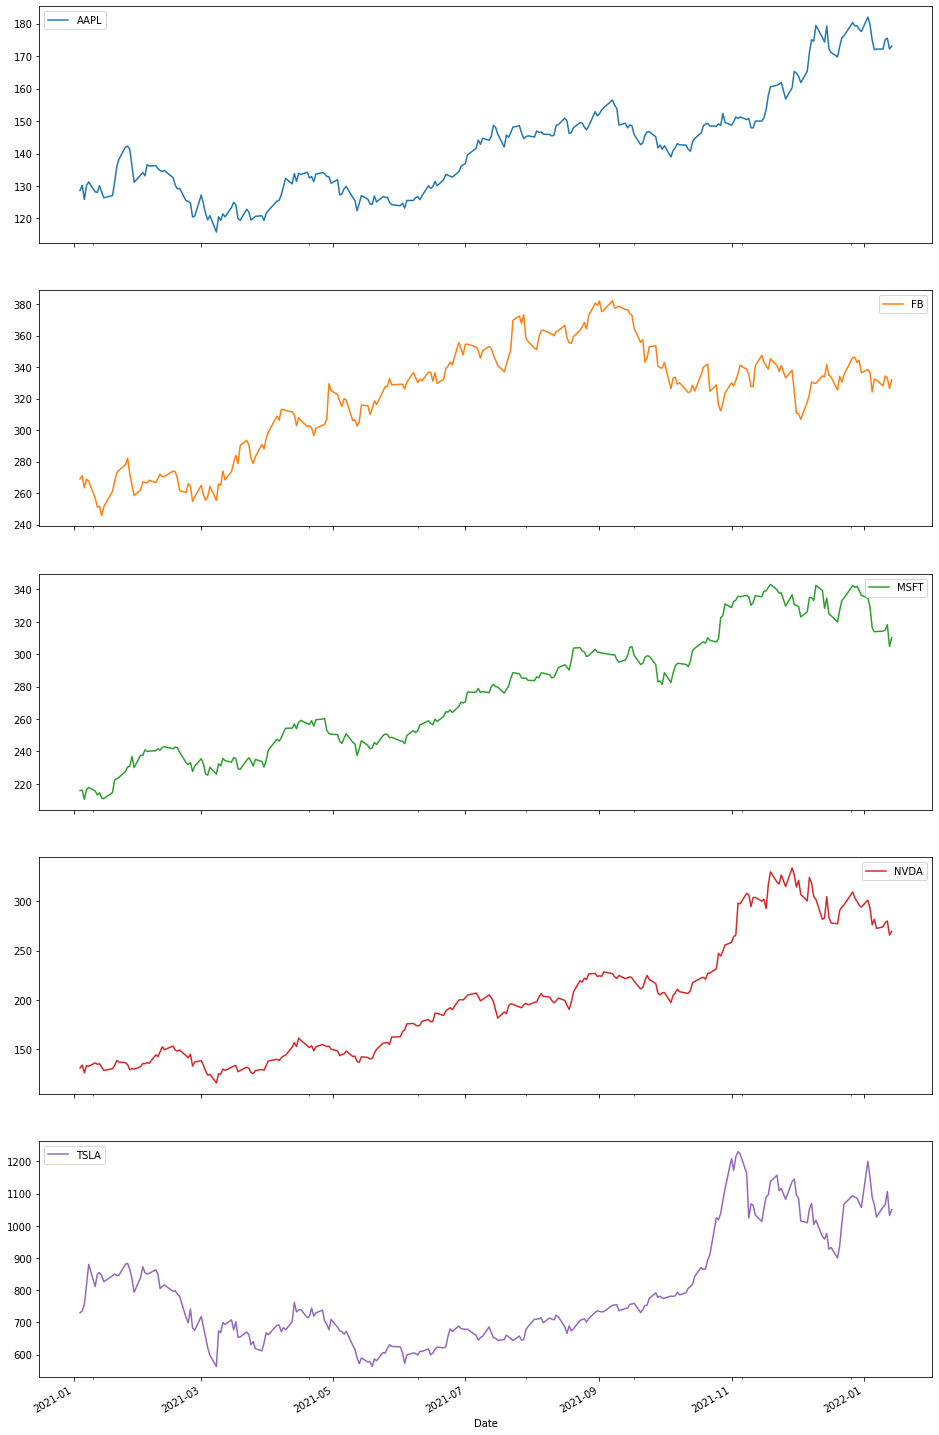

In [ ]:
df1.plot(kind='line', subplots=True, figsize=(16,28));

In [ ]:
df1.columns

Index(['AAPL', 'FB', 'MSFT', 'NVDA', 'TSLA'], dtype='object')

## **Calcular el rendimiento períodico de cada acción**

In [ ]:
# función pct_change de la biblioteca pandas calcula el cambio porcentual entre un elemento y el anterior.
rendimientos = df1.pct_change().dropna()
rendimientos

,AAPL,FB,MSFT,NVDA,TSLA
Date,,,,,
2021-01-05,0.012362,0.007548,0.000973,0.022210,0.007317
2021-01-06,-0.033715,-0.028269,-0.025915,-0.058986,0.028390
2021-01-07,0.034176,0.020622,0.028457,0.057843,0.079447
2021-01-08,0.008607,-0.004354,0.006051,-0.005026,0.078403
2021-01-11,-0.023240,-0.040102,-0.009688,0.026008,-0.078214
...,...,...,...,...,...
2022-01-10,0.000116,-0.011212,0.000732,0.005615,0.030342
2022-01-11,0.016784,0.019203,0.002259,0.015219,0.005935
2022-01-12,0.002570,-0.003320,0.010445,0.006543,0.039290


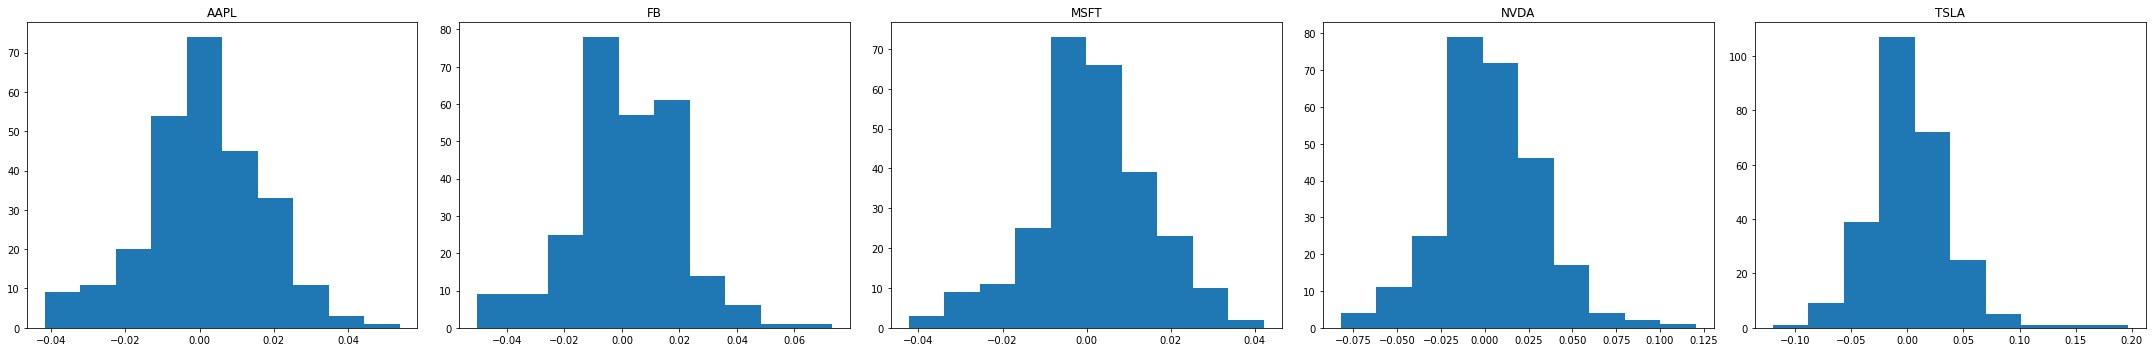

In [ ]:
fig, ax = plt.subplots(1, len(rendimientos.columns), sharey=False, tight_layout=True, figsize = (30,5))
for i in range(len(rendimientos.columns)):
    ax[i].hist(rendimientos[rendimientos.columns[i]])
    ax[i].set_title(rendimientos.columns[i])
    

In [ ]:
rendimientos.describe()

,AAPL,FB,MSFT,NVDA,TSLA
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,0.001262,0.000979,0.001482,0.003168,0.002015
std,0.015766,0.018616,0.013581,0.028524,0.035606
min,-0.041701,-0.050515,-0.042323,-0.082148,-0.119903
25%,-0.007661,-0.010544,-0.005583,-0.012440,-0.017438
50%,0.001413,0.000061,0.000732,0.002876,0.001770
75%,0.012362,0.014022,0.010289,0.020043,0.019122
max,0.053853,0.072973,0.042127,0.120399,0.196412


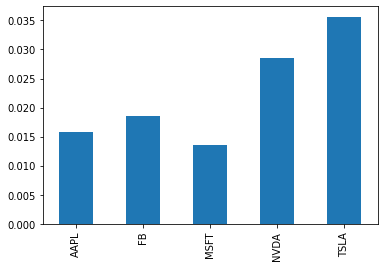

In [ ]:
rendimientos.std().plot(kind='bar')

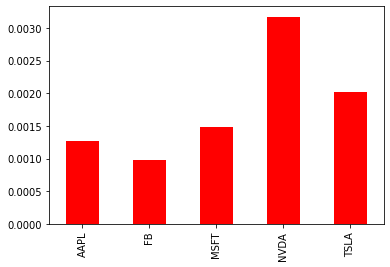

In [ ]:
rendimientos.mean().plot(kind='bar', color='red')

La media de los rendimientos de una acción representa el rendimiento esperado de ese título

In [ ]:
rendEspD = rendimientos.mean()
rendEspD

AAPL    0.001262
FB      0.000979
MSFT    0.001482
NVDA    0.003168
TSLA    0.002015
dtype: float64

## PASO 4: **Construimos la matriz de covarianza y matriz de correlaciones**

La matriz de covarianzas y correlaciones permiten observar como se comporta cada acción con respecto a las demás. 

### Matriz de varianzas y covarianzas

In [ ]:
matrizCov = rendimientos.cov()
matrizCov

,AAPL,FB,MSFT,NVDA,TSLA
AAPL,0.000249,0.000148,0.000145,0.000240,0.000267
FB,0.000148,0.000347,0.000131,0.000240,0.000208
MSFT,0.000145,0.000131,0.000184,0.000233,0.000202
NVDA,0.000240,0.000240,0.000233,0.000814,0.000461
TSLA,0.000267,0.000208,0.000202,0.000461,0.001268


### Matriz de correlaciones

In [ ]:
matrizCorr = rendimientos.corr()
matrizCorr

,AAPL,FB,MSFT,NVDA,TSLA
AAPL,1.000000,0.504531,0.677568,0.534476,0.476426
FB,0.504531,1.000000,0.517752,0.452224,0.314173
MSFT,0.677568,0.517752,1.000000,0.600976,0.417169
NVDA,0.534476,0.452224,0.600976,1.000000,0.453863
TSLA,0.476426,0.314173,0.417169,0.453863,1.000000


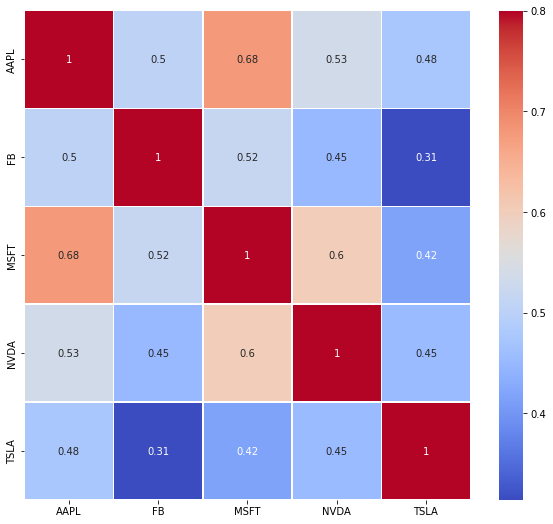

In [ ]:
plt.figure(figsize=(10,9))
sns.heatmap(matrizCorr, cmap="coolwarm", linewidth=0.5, annot=True, vmax=0.8)
plt.show()

## PASO 5: **Calculamos el rendimiento y riesgo de la cartera**

Participación de cada acción en nuestra cartera. 


*   AAPLE = 25%
*   FB = 20%
*   MSFT = 25%
*   NVDA = 20%
*   TSLA = 10%

Como se puede observar la suma de las participaciones (w) suman el 100%, que representa el 100% de nuestra riqueza.

También es importante aclarar que estas participaciones fueron asignadas de manera arbitraria, esta cartera no está optimizada.

In [ ]:
w = [0.25, 0.2, 0.25, 0.2, 0.1]

### Rendimiento de la cartera

In [ ]:
rendCartera = (rendEspD*w).sum()
rendCartera

0.0017168005443888897

### Riesgo de la cartera
Se multiplica la lista de las participaciones (w) horizontal y verticalmente por la matriz de varianzas y covarianzas.

In [ ]:
riesgoCartera = matrizCov.mul(w, axis=0).mul(w, axis=1).sum().sum()
riesgoCartera = np.sqrt(riesgoCartera)
riesgoCartera

0.015777717917375592

## PASO 6: **Calculamos los rendimientos y riesgos anuales de cada acción**

In [ ]:
rendAnual = rendimientos.mean().apply(lambda x: ((1+x)**365)-1)
rendAnual

AAPL    0.584448
FB      0.429146
MSFT    0.716752
NVDA    2.172817
TSLA    1.085026
dtype: float64

Comprobación:

In [ ]:
((1 + rendimientos.AAPL.mean())**365)-1

0.5844475240043492

In [ ]:
riesgoAnual = rendimientos.std().apply(lambda x: x*np.sqrt(252))
riesgoAnual

AAPL    0.250273
FB      0.295527
MSFT    0.215596
NVDA    0.452799
TSLA    0.565235
dtype: float64

In [ ]:
resumen = pd.concat([rendAnual, riesgoAnual], axis=1)
resumen.columns = ["Rendimiento", "Riesgo"]
resumen

,Rendimiento,Riesgo
AAPL,0.584448,0.250273
FB,0.429146,0.295527
MSFT,0.716752,0.215596
NVDA,2.172817,0.452799
TSLA,1.085026,0.565235


## PASO 7: **Frontera eficiente**

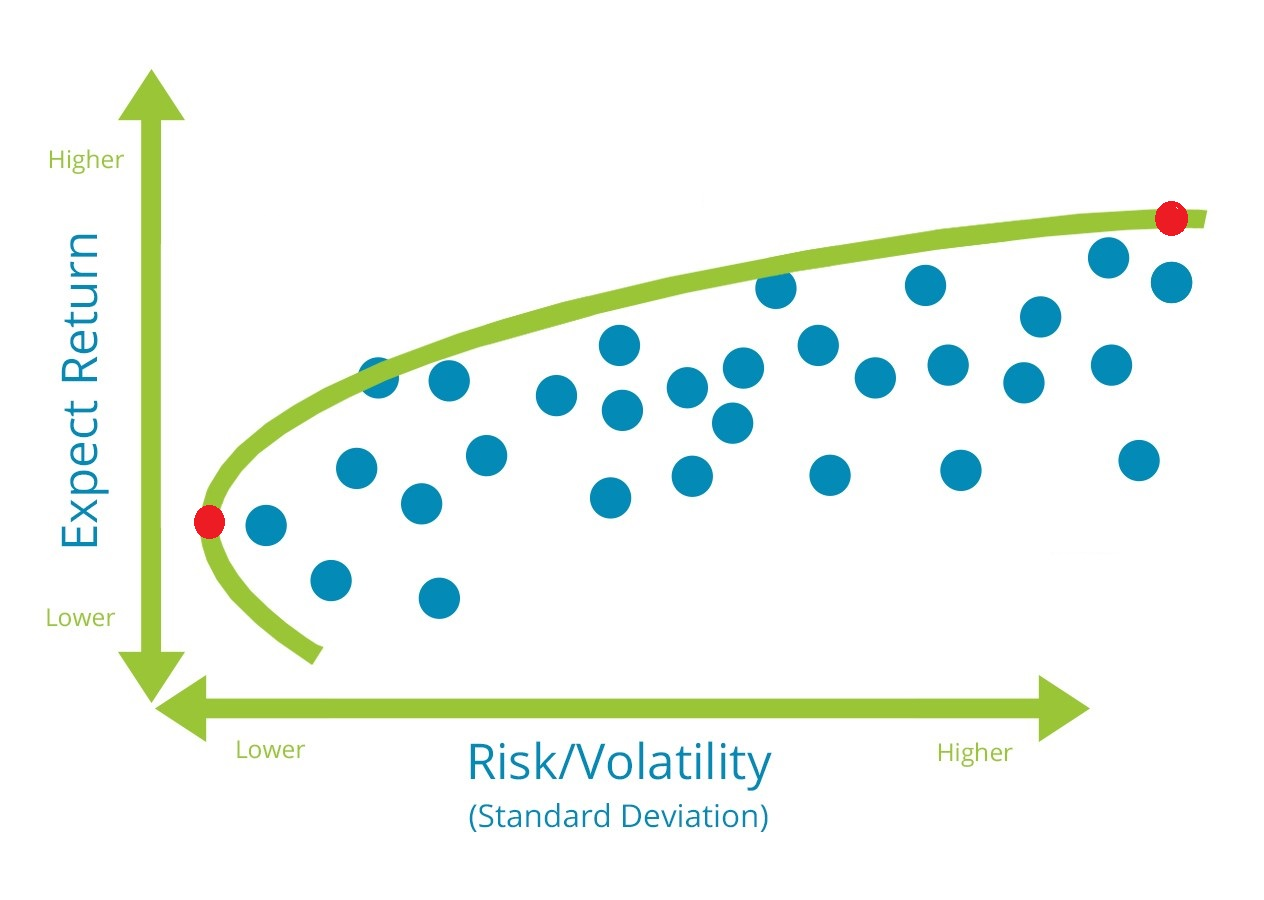

La línea verde que se encuentra entre los dos puntos rojos (cartera de mínimo riesgo y de máximo rendimiento) representa la frontera eficiente. 

Cada punto representa una cartera. Mientras más cercanos se encuentren a la frontera eficiente tienen mayor potencial de producir el menor riesgo para un máximo rendimiento de una inversión bursátil. 

### Definimos 3 arreglos vacios: rendimiento, riesgo y participaciones de las carteras

In [ ]:
rendC = []
riesgoC = []
partC = [] 

### Determinamos la cantidad de acciones que compondrá cada cartera y la cantidad de carteras que se generarán

In [ ]:
numAcciones = len(df1.columns)
numCarteras = 5000

### Generamos un bucle que que simule el número de carteras definidas
En cada iteración el bucle considera las diferentes participaciones de las acciones y calcula el rendimiento y riesgo de la cartera en base a esas participaciones.

Para obtener números aleatorios para las participaciones, usaremos la función np.random.random(). Es necesario recordar que la suma de las participaciones debe ser 1, entonces dividimos las participaciones por su suma acumulada.

In [ ]:
for cartera in range (numCarteras):
    w = np.random.random(numAcciones)
    w = w/np.sum(w)
    partC.append(w)
    rendimiento = np.dot(w, rendEspD)
    rendC.append(rendimiento)
    var = matrizCov.mul(w, axis=0).mul(w, axis=1).sum().sum()
    desvEst = np.sqrt(var)
    #riesgo = desvEst*np.sqrt(252)
    riesgoC.append(desvEst)

### Mostramos el Dataframe con las carteras creadas

In [ ]:
data = {'Rendimiento':rendC, 'Riesgo':riesgoC}

for counter, symbol in enumerate(df1.columns.tolist()):
    data[symbol+' w'] = [w[counter] for w in partC]

In [ ]:
carteras  = pd.DataFrame(data)
carteras

,Rendimiento,Riesgo,AAPL w,FB w,MSFT w,NVDA w,TSLA w
0,0.001585,0.015980,0.285841,0.267439,0.162344,0.128909,0.155467
1,0.001254,0.013675,0.294208,0.376157,0.312178,0.014551,0.002906
2,0.001716,0.016256,0.263938,0.173046,0.231175,0.175667,0.156174
3,0.001736,0.018872,0.204755,0.248704,0.086260,0.154754,0.305528
4,0.001603,0.019122,0.266690,0.292018,0.017313,0.086944,0.337035
...,...,...,...,...,...,...,...
4995,0.001744,0.015414,0.226925,0.204464,0.311192,0.240927,0.016492
4996,0.001781,0.017836,0.084643,0.169029,0.319470,0.152189,0.274669
4997,0.002206,0.021570,0.000470,0.218007,0.088517,0.402370,0.290636
4998,0.001456,0.014507,0.303542,0.285759,0.251770,0.086861,0.072069


### Graficamos las carteras creadas

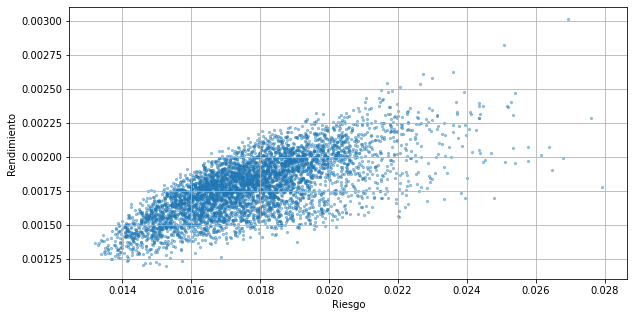

In [ ]:
carteras.plot.scatter(x='Riesgo', y='Rendimiento', marker='o', s=5, alpha=0.4, grid=True, figsize=[10,5])

### Cartera de mínimo riesgo y máximo rendimiento
La cartera de mínimo riesgo es aquella cartera que se encuentra más a la izquierda en el gráfico. La cartera de máximo rendimiento es la que se encuentra más al norte.

In [ ]:
minRiesgo = carteras.iloc[carteras['Riesgo'].idxmin()]
minRiesgo

Rendimiento    0.001365
Riesgo         0.013205
AAPL w         0.102043
FB w           0.239184
MSFT w         0.626111
NVDA w         0.007781
TSLA w         0.024881
Name: 95, dtype: float64

In [ ]:
maxRend = carteras.iloc[carteras['Rendimiento'].idxmax()]
maxRend

Rendimiento    0.003012
Riesgo         0.026927
AAPL w         0.007505
FB w           0.037481
MSFT w         0.028074
NVDA w         0.915767
TSLA w         0.011172
Name: 389, dtype: float64

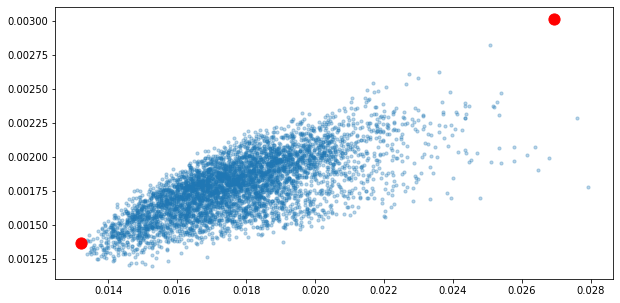

In [ ]:
plt.subplots(figsize=[10,5])
plt.scatter(x = carteras.Riesgo, y = carteras.Rendimiento, marker='o', s=10, alpha=0.3)
plt.scatter(minRiesgo[1], minRiesgo[0], color='r', marker='.', s=500)
plt.scatter(maxRend[1], maxRend[0], color='r', marker='.', s=500)

## PASO 8: **Encontrando la cartera óptima**

## Determinamos el Ratio de Sharpe
Representa el adicional por riesgo de mercado (rendimiento de la cartera menos la tasa libre de riesgo) por unidad de riesgo total de una inversión. El riesgo total es representado por la desviación estándar de la cartera. Puede considerarse como tasa libre de riesgo a la tasa de los bonos del tesoro de Estados Unidos a 10 años (Treasury Yield 10 Years). 

La fórmula para calcular el ratio de sharpe es:

 $\frac{R_{p} - r_{f}}{\sigma_{p}}$


Tasa libre de riesgo

In [ ]:
rf = yf.Ticker('^TNX')
rf.history().tail(1)['Close']

Date
2022-01-14    1.772
Name: Close, dtype: float64

In [ ]:
rf = 0.0135/365
optC = carteras.iloc[((carteras['Rendimiento']-rf)/carteras['Riesgo']).idxmax()]
optC

Rendimiento    0.002031
Riesgo         0.016587
AAPL w         0.003417
FB w           0.034195
MSFT w         0.625046
NVDA w         0.335756
TSLA w         0.001585
Name: 2107, dtype: float64

Esta cartera contiene las participaciones de las acciones que maximiza el rendimiento por unidad de riesgo.

### Graficamos la cartera óptima

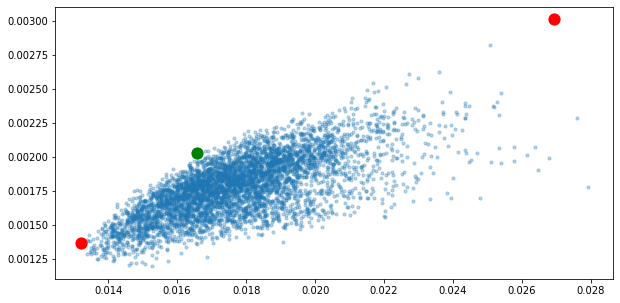

In [ ]:
plt.subplots(figsize=[10,5])
plt.scatter(x = carteras.Riesgo, y = carteras.Rendimiento, marker='o', s=10, alpha=0.3)
plt.scatter(minRiesgo[1], minRiesgo[0], color='r', marker='.', s=500)
plt.scatter(maxRend[1], maxRend[0], color='r', marker='.', s=500)
plt.scatter(optC[1], optC[0], color='g', marker='.', s=500)